# Correctness, time of response and difficulty of tasks in groups of graphics A and B

### 1. Correctness

HO: There is no statistically significant difference in the correctness of answers between groups of graphics A and B.

H1: There is a statistically significant difference in the correctness of answers between groups of graphics A and B.

### 2. Time of response

HO: There is no statistically significant difference in the response time between groups of graphics A and B.

H1: There is a statistically significant difference in the response time between groups of graphics A and B.

### 3. Difficulty

HO: There is no statistically significant difference in the difficulty of the task between groups of graphics A and B.

H1: There is a statistically significant difference in the difficulty of the task between groups of graphics A and B.

Significance level: $\alpha=0.05$


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functions.tests.dependent_groups.two_groups import wilcoxon_test, ttest_or_wilcoxon, mcnemar_test
from functions.plots import plot_heatmap, plot_two_boxplots, plot_two_density

In [35]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv', index_col='ID')

df_time = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/times.csv', index_col='ID')

Sets:
- sum A vs sum B
- 1a vs 1b
- 2a vs 2b
- 3a vs 3b

In [36]:
ALPHA = 0.05

### 1. Correctness A vs B

SumCorr_b  0  1  2  3
SumCorr_a            
0          1  0  0  0
1          0  3  5  0
2          0  3  8  5
3          0  0  8  7
McNemar statistic: 0.0
p-value: 1.0
No reason to reject H0, accept H0.


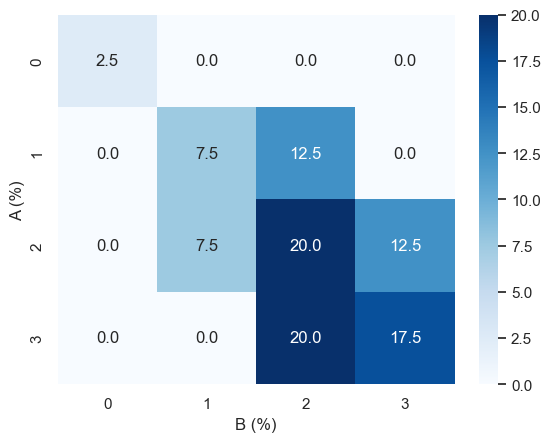

In [37]:
# sums
var1 = 'SumCorr_a'
var2 = 'SumCorr_b'
mcnemar_test(df_answers, var1, var2, ALPHA)
plot_heatmap(df_answers, var1, var2, 'A', 'B', cmap='Blues')

In [38]:
# task 1
var1 = '1a_corr'
var2 = '1b_corr'
mcnemar_test(df_answers, var1, var2, ALPHA)

1b_corr  0   1
1a_corr       
0        2   3
1        1  34
McNemar statistic: 1.0
p-value: 0.625
No reason to reject H0, accept H0.


'0.62'

In [39]:
# task 2
var1 = '2a_corr'
var2 = '2b_corr'
mcnemar_test(df_answers, var1, var2, ALPHA)

2b_corr  0   1
2a_corr       
0        8   4
1        3  25
McNemar statistic: 3.0
p-value: 1.0
No reason to reject H0, accept H0.


'1.00'

In [40]:
# task 3
var1 = '3a_corr'
var2 = '3b_corr'
mcnemar_test(df_answers, var1, var2, ALPHA)

3b_corr   0   1
3a_corr        
0        12   6
1        10  12
McNemar statistic: 6.0
p-value: 0.454498291015625
No reason to reject H0, accept H0.


'0.45'

Plot of the correctness of answers in groups A and B for each task

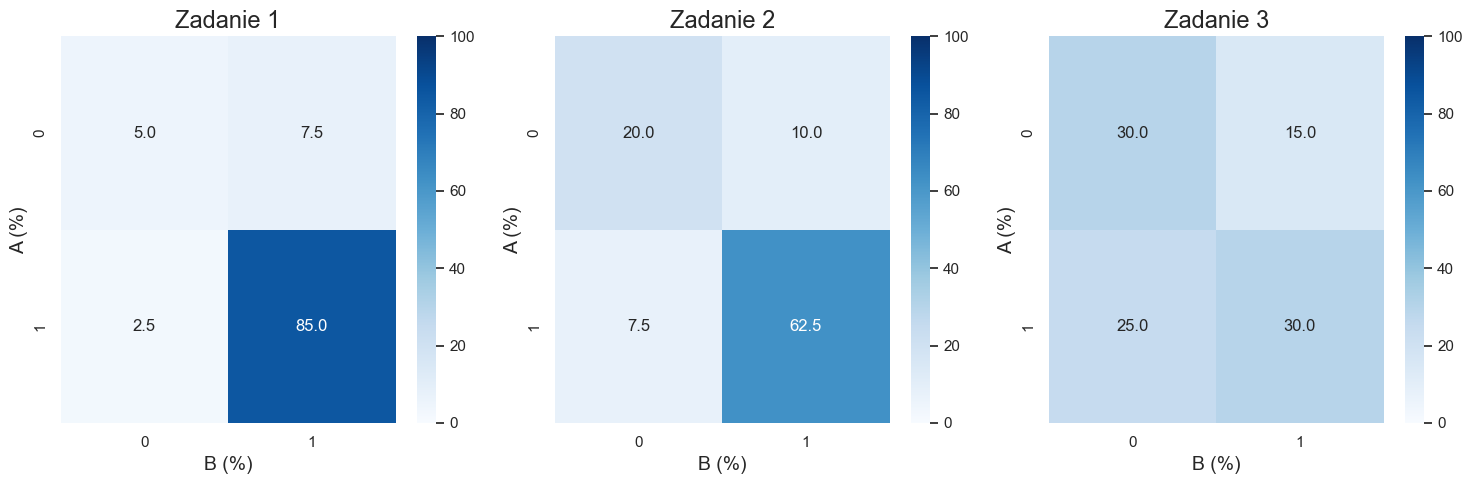

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i in range(3):
    table = pd.crosstab(df_answers[f'{i+1}a_corr'], df_answers[f'{i+1}b_corr'], normalize=True) * 100

    sns.heatmap(table, annot=True, fmt=".1f", cmap='Blues', vmin=100, vmax=0, ax=axes[i])
    axes[i].set_xlabel('B' + " (%)", fontsize=14)
    axes[i].set_ylabel('A' + " (%)", fontsize=14)
    axes[i].set_title(f'Zadanie {i+1}', fontsize=17)

plt.tight_layout()
plt.show();

### 2. Difficulty - A vs B

Wilcoxon statistic: 197.5
p-value: 0.466539772751279
No reason to reject H0, accept H0.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


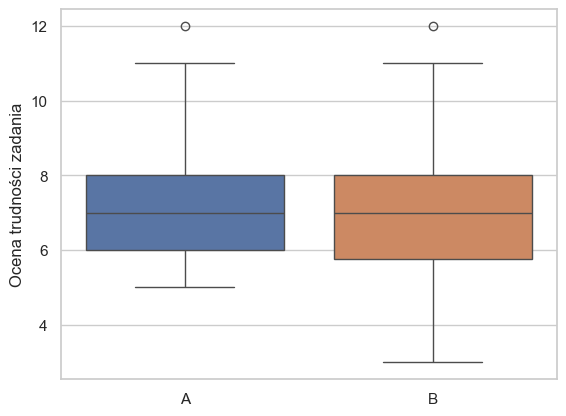

In [42]:
# sums
var1 = 'SumTrud_a'
var2 = 'SumTrud_b'
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)
plot_two_boxplots(df_answers[var1], df_answers[var2], 'A', 'B', 'Ocena trudności zadania', '')

In [43]:
# task 1
var1 = '1a_trud'
var2 = '1b_trud'
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

Wilcoxon statistic: 121.0
p-value: 0.009168385235709786
There are grounds to reject H0, accept H1.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


'0.01'

In [44]:
# task 2
var1 = '2a_trud'
var2 = '2b_trud'
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

Wilcoxon statistic: 149.0
p-value: 0.32215759615581485
No reason to reject H0, accept H0.


'0.32'

In [45]:
# task 3
var1 = '3a_trud'
var2 = '3b_trud'
wilcoxon_test([df_answers[var1], df_answers[var2]], ALPHA)

Wilcoxon statistic: 45.0
p-value: 0.0016717283964848024
There are grounds to reject H0, accept H1.


'0.00'

Plot of the difficulty of tasks in groups A and B for each task

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1351/3586811486.py:24: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1351/3586811486.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


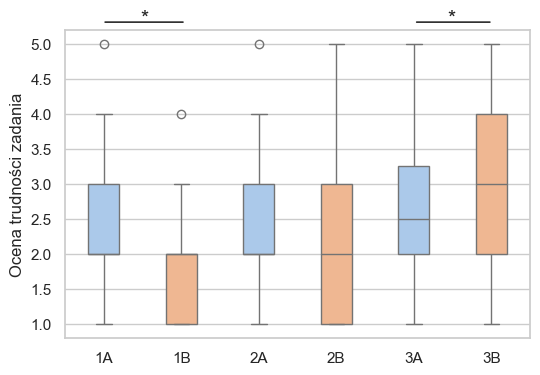

In [46]:
plt.figure(figsize=(6, 4))

df_long = pd.melt(df_answers, 
                  value_vars=['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud'],
                  var_name='Pair', 
                  value_name='Value')

colors = sns.color_palette('pastel', n_colors=2)
hue_order = ['1a_trud', '1b_trud', '2a_trud', '2b_trud', '3a_trud', '3b_trud']
labels = ['1A', '1B', '2A', '2B', '3A', '3B']

plt.annotate('', xy=(0.08, 1.025), xycoords='axes fraction', xytext=(0.26, 1.025),
             textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.17, 1.005), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate('', xy=(0.75, 1.025), xycoords='axes fraction', xytext=(0.92, 1.025),
             textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, 1.005), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)


sns.set(style="whitegrid")
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', 
                 palette=colors, hue_order=hue_order, width=0.4)

plt.xlabel('')
ax.set_xticklabels(labels)
plt.ylabel('Ocena trudności zadania')
plt.show();

### 3. Time - A vs B

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 78.0
p-value: 1.1621450539678335e-06
There are grounds to reject H0, accept H1.


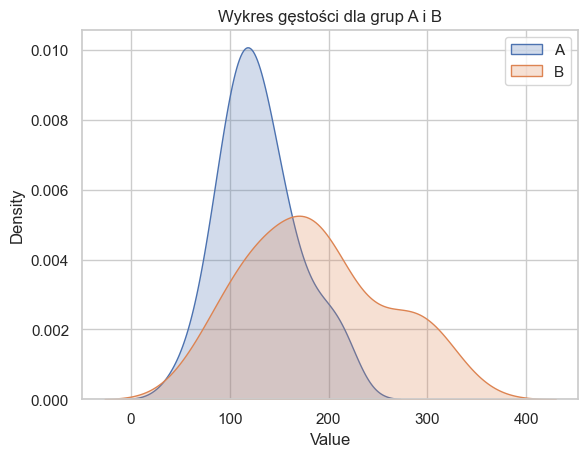

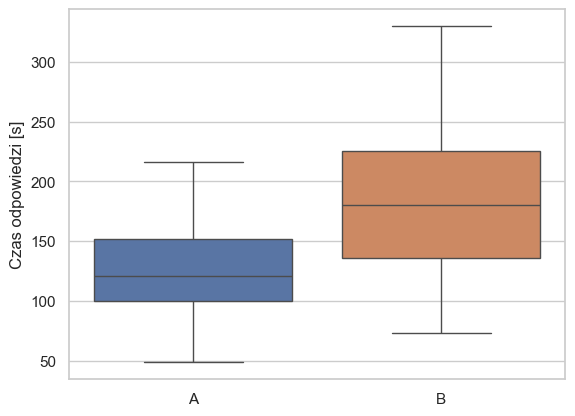

In [47]:
# sums
var1 = 'SumTime_a'
var2 = 'SumTime_b'
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)
plot_two_density(df_time[var1], df_time[var2])
plot_two_boxplots(df_time[var1], df_time[var2], 'A', 'B', 'Czas odpowiedzi [s]', '')

In [48]:
# task 1
var1 = 'Duration_1a'
var2 = 'Duration_1b'
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 364.0
p-value: 0.5448004511072213
No reason to reject H0, accept H0.


'0.54'

In [49]:
# task 2
var1 = 'Duration_2a'
var2 = 'Duration_2b'
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

Conducting normality test...
Conducting Wilcoxon test...
Wilcoxon statistic: 133.0
p-value: 9.446514923183713e-05
There are grounds to reject H0, accept H1.


'0.00'

In [50]:
# task 3
var1 = 'Duration_3a'
var2 = 'Duration_3b'
ttest_or_wilcoxon([df_time[var1], df_time[var2]], ALPHA)

Conducting normality test...
Conducting homogeneity variance test...
Conducting Wilcoxon test...
Wilcoxon statistic: 34.0
p-value: 6.775735528208315e-09
There are grounds to reject H0, accept H1.


'0.00'

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1351/1458565898.py:22: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair',
/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_1351/1458565898.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


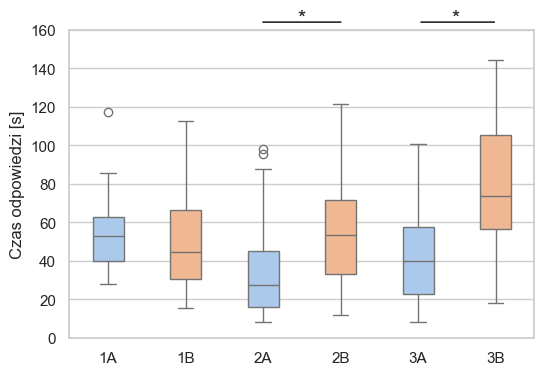

In [51]:
plt.figure(figsize=(6, 4))
value_vars=['Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']

df_long = pd.melt(df_time, value_vars=value_vars, var_name='Pair', value_name='Value')

colors = sns.color_palette('pastel', n_colors=2)  # Wybór kolorów z palety Set3
hue_order = ['Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
labels = ['1A', '1B', '2A', '2B', '3A', '3B']

plt.annotate('', xy=(0.41, 1.025), xycoords='axes fraction', xytext=(0.59, 1.025),
             textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.5, 1.005), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)

plt.annotate('', xy=(0.75, 1.025), xycoords='axes fraction', xytext=(0.92, 1.025),
             textcoords='axes fraction', arrowprops=dict(arrowstyle="-", color="black"))
plt.annotate('*', xy=(0.83, 1.005), xycoords='axes fraction', textcoords='axes fraction',
             ha='center', va='bottom', fontsize=15)


sns.set(style="whitegrid")
ax = sns.boxplot(data=df_long, x='Pair', y='Value', hue='Pair', 
                 palette=colors, hue_order=hue_order,width=0.4)

plt.xlabel('')
plt.ylim(0, 160)
ax.set_xticklabels(labels)
plt.ylabel('Czas odpowiedzi [s]')
plt.show()

### Summary:
There is a statistically significant difference in:
- the difficulty of the task: between groups 1a vs 1b and 3a vs 3b
- the response time: between groups sum A vs sum B, 2a vs 2b, 3a vs 3b